In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
data = pd.read_csv('churn_prediction.csv')

In [4]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,Unnamed: 22,Unnamed: 23
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,NaN,NaN
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01,NaN,NaN
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06,NaN,NaN
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,NaN,NaN


In [5]:
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,Unnamed: 22,Unnamed: 23
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22,NaN,NaN
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17,NaN,NaN
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31,NaN,NaN
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaN,NaN,NaN
28381,30301,2349,18,Male,0.0,student,1232.0,2,474,59.0,...,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02,NaN,NaN


In [6]:
data.shape

(28382, 24)

In [7]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [8]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
Unnamed: 22                       float64
Unnamed: 23                       

In [9]:
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [10]:
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

In [11]:
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
Unnamed: 22                       float64
Unnamed: 23                       float64
dtype: object

In [12]:
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

In [13]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
Unnamed: 22                        float64
Unnamed: 23

In [14]:
data[['gender','occupation','last_transaction']].head(7)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaN
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24


In [15]:
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

In [16]:
date = pd.DatetimeIndex(data['last_transaction'])

In [17]:
# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [18]:
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaN,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


In [19]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
Unnamed: 22                        float64
Unnamed: 23                        float64
doy_ls_tran

In [20]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
Unnamed: 22                       float64
Unnamed: 23                       float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [21]:
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [24]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_num(data, var_group):

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    points = mean-st_dev, mean+st_dev

    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### customer_information

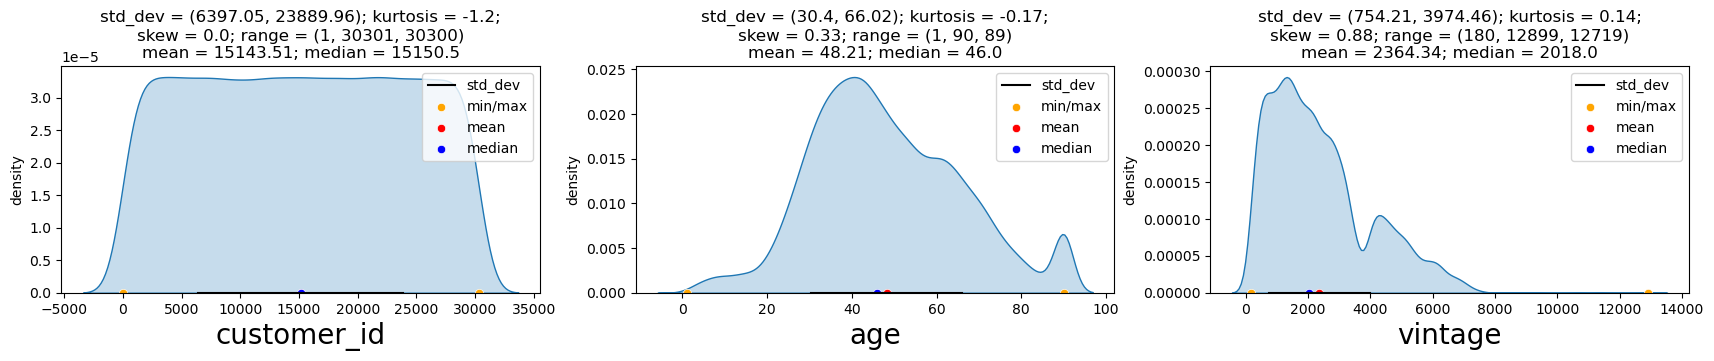

In [25]:
UVA_num(data,customer_details)

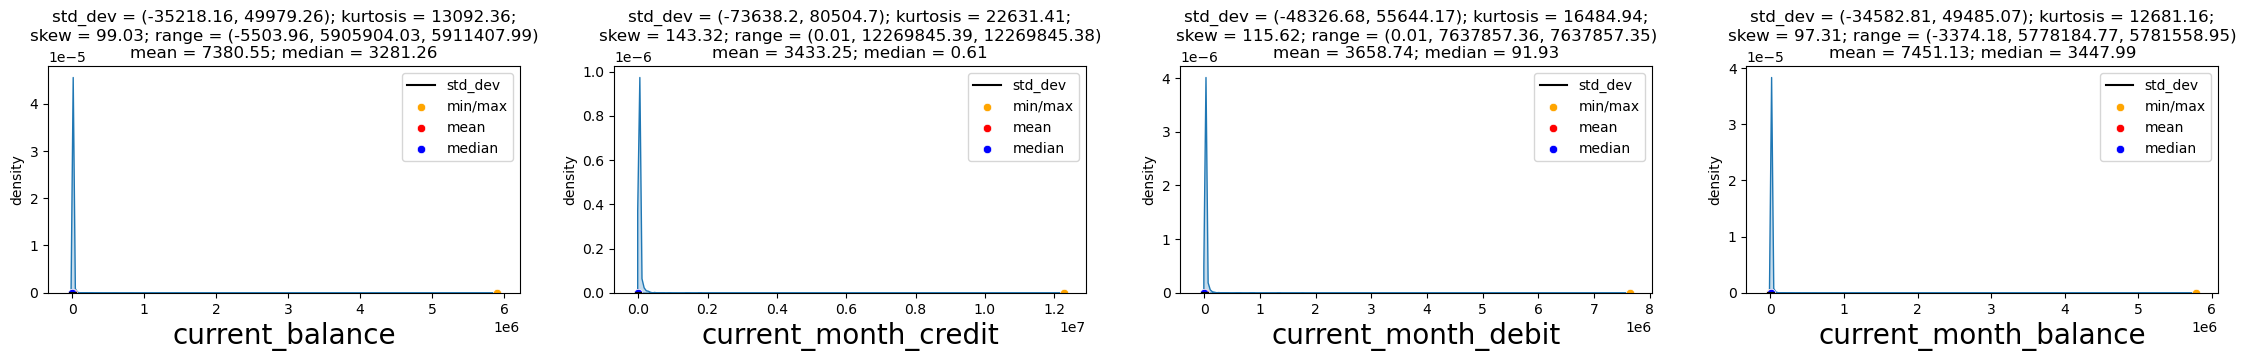

In [26]:
UVA_num(data,current_month)

In [27]:
# Remove Outliers to visulaise these plots
factor = 3

cm_data = data[current_month]

cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

len(data), len(cm_data)

(28382, 27113)

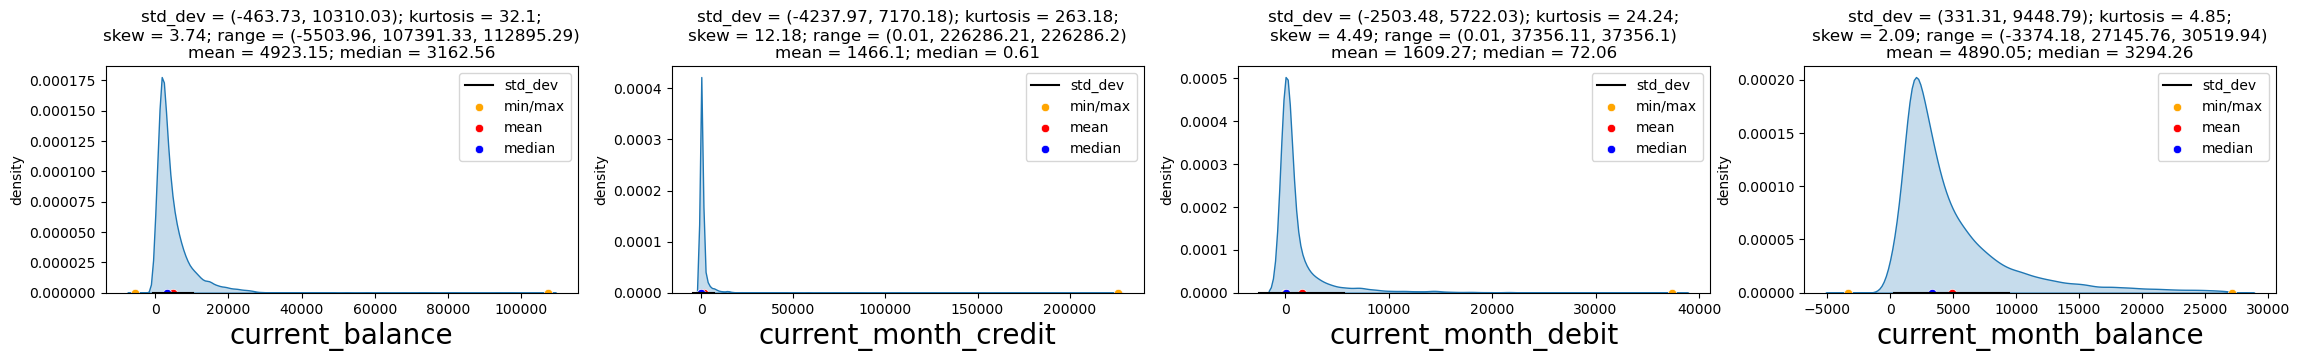

In [28]:
UVA_num(cm_data,current_month)

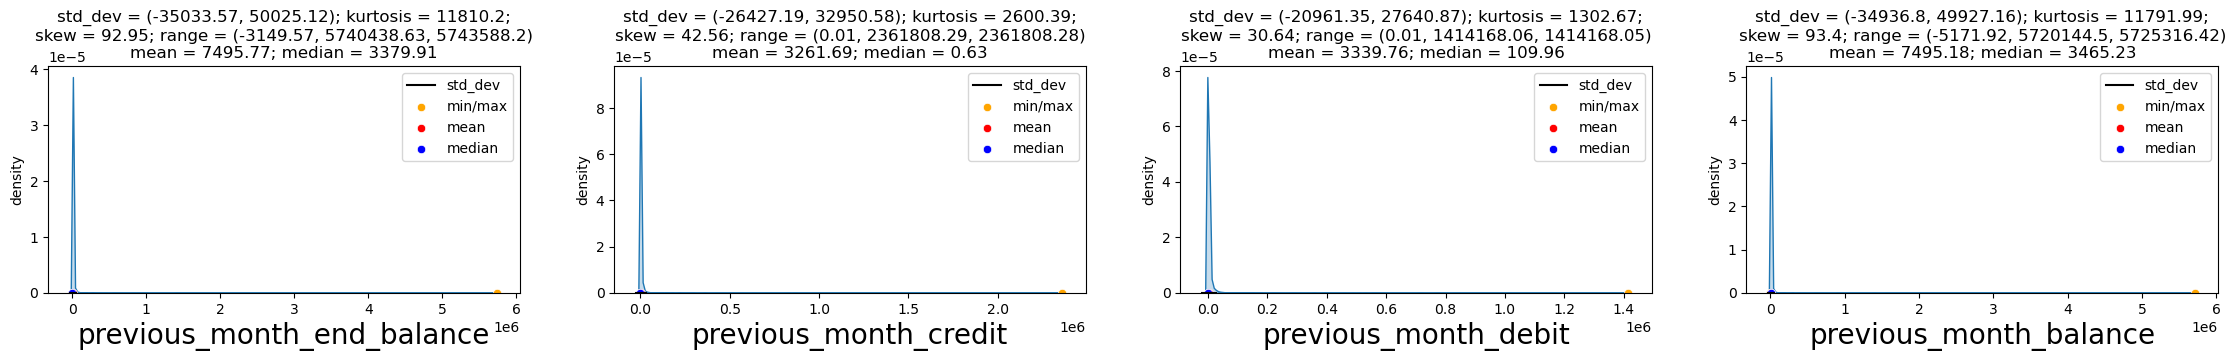

In [29]:
# After Removing extreme/outliers, plots are still very skewed.
UVA_num(data,previous_month)

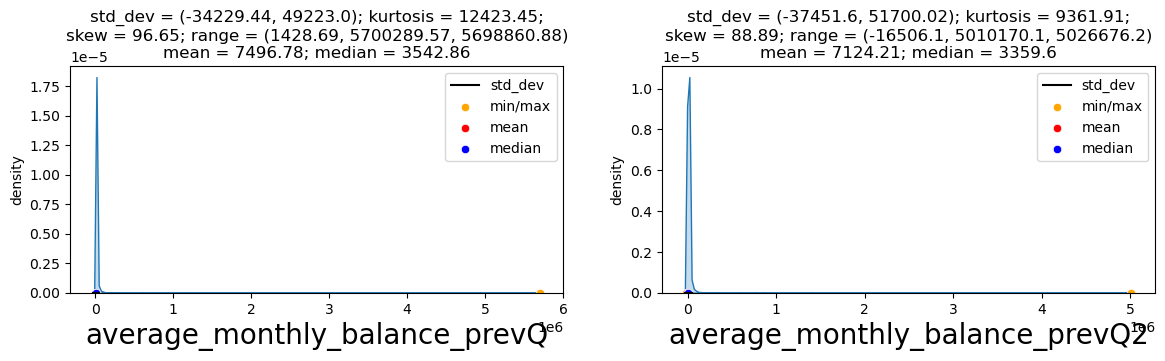

In [30]:
UVA_num(data,previous_quarters)

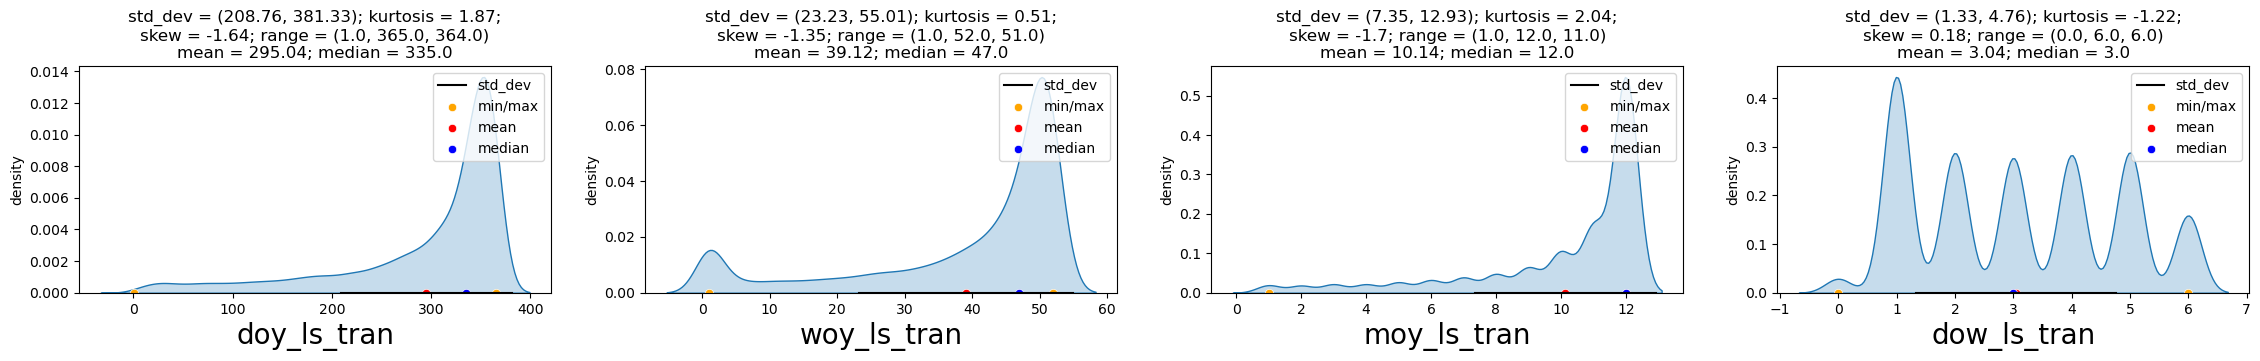

In [31]:
UVA_num(data,transaction_date)

In [32]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [35]:
# Custom function for easy visualisation of Categorical Variables
def UVA_ctg(data, var_group):

  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

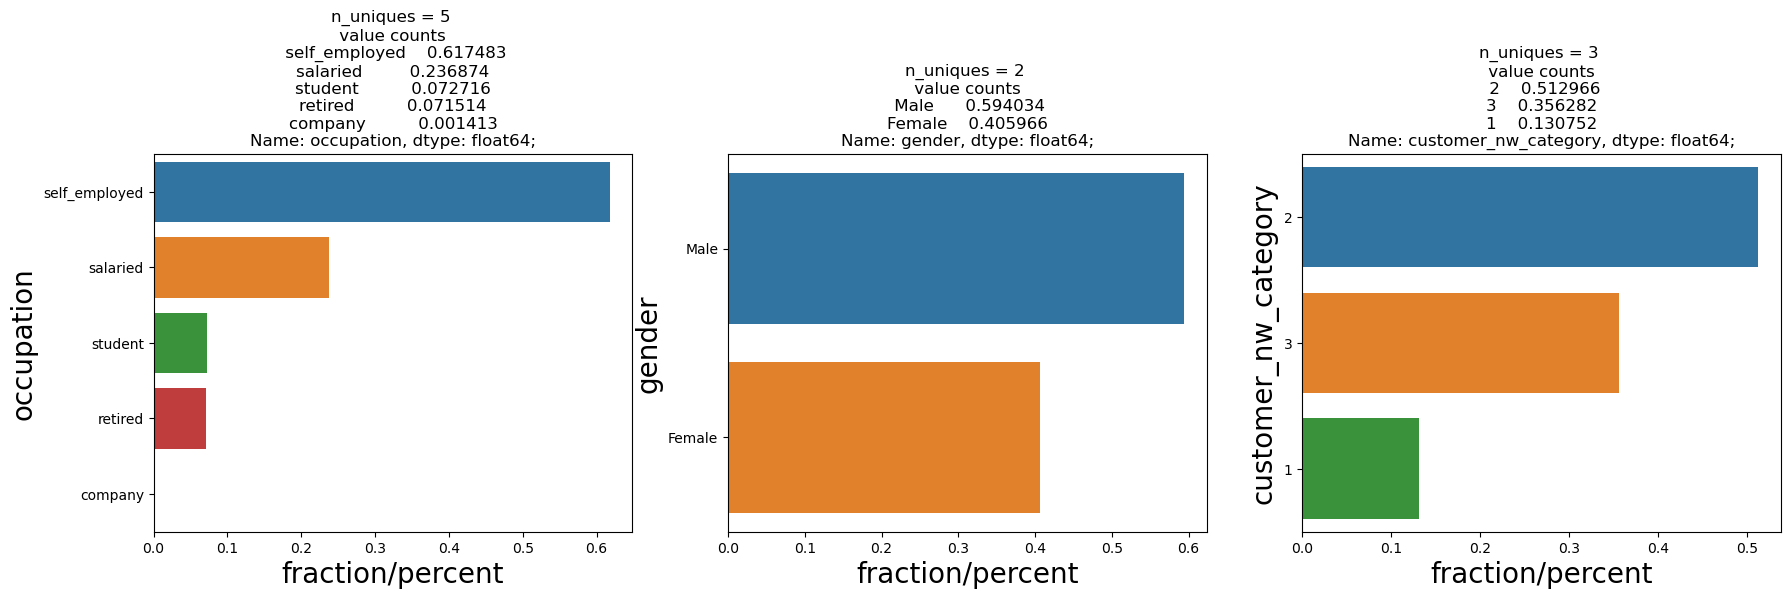

In [36]:
# Grouping Varibales
# customer_info: gender, occupation, customer_nw_category
UVA_ctg(data, ['occupation', 'gender', 'customer_nw_category'])

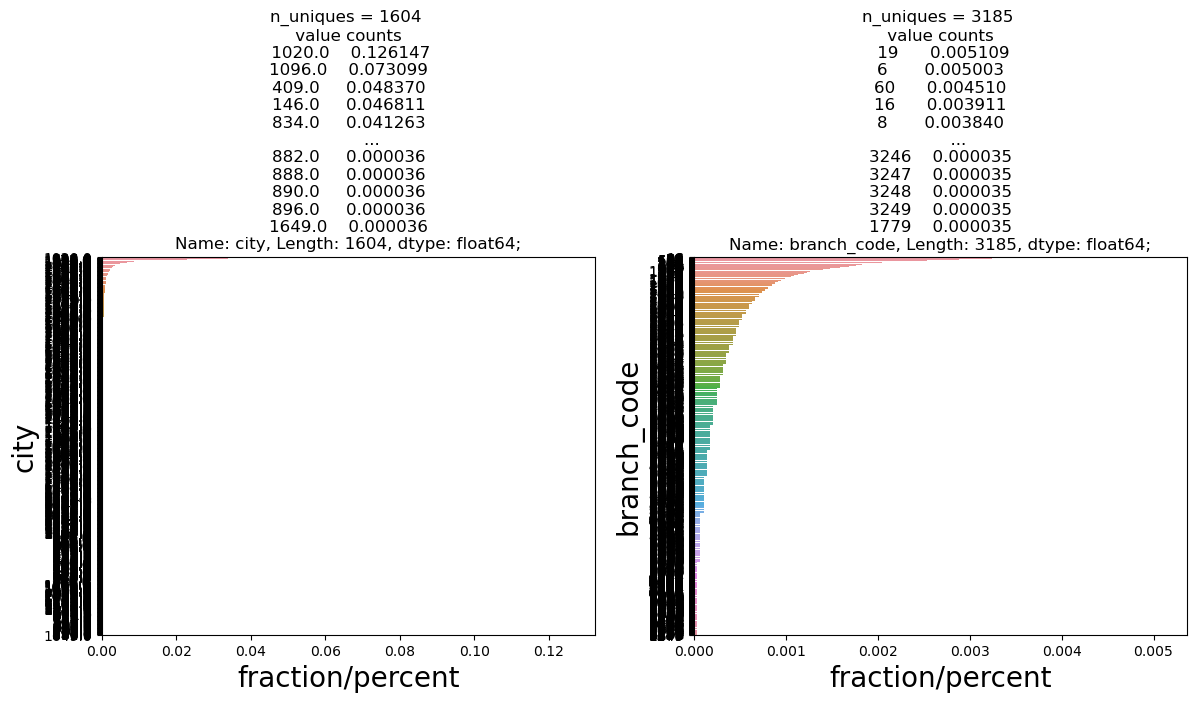

In [37]:
# Grouping Varibales
# account_info: city, branch_code
UVA_ctg(data, ['city', 'branch_code'])

(0.0, 0.02)

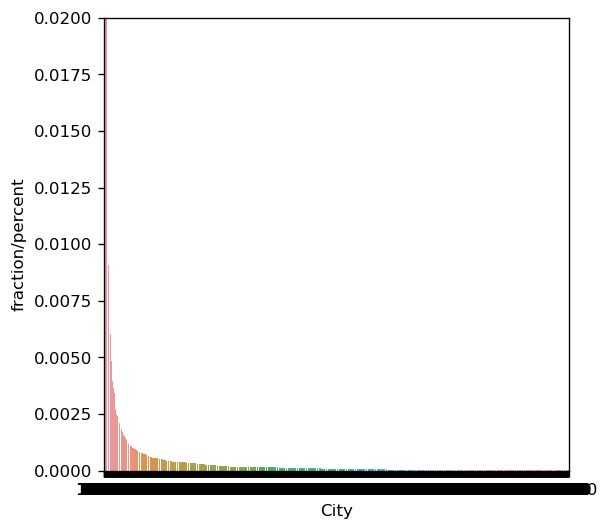

In [38]:
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

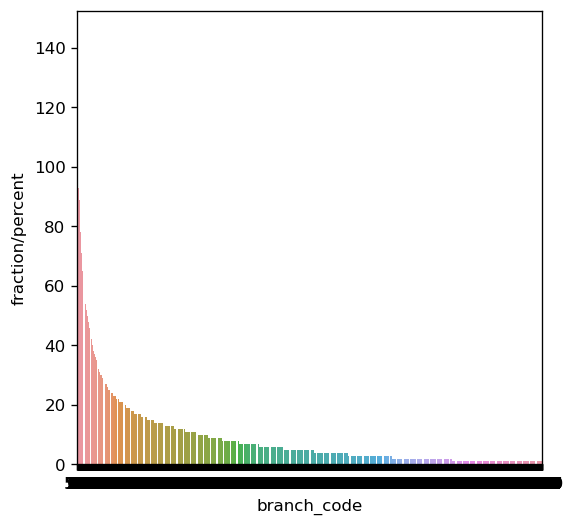

In [39]:
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')

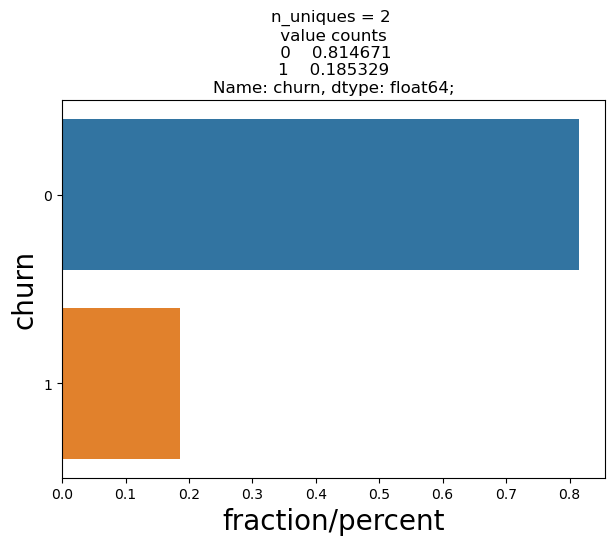

In [40]:
UVA_ctg(data, ['churn'])

In [41]:
# missing values in every variable
data.isnull().sum()

customer_id                           0
vintage                               0
age                                   0
gender                              525
dependents                         2463
occupation                           80
city                                803
customer_nw_category                  0
branch_code                           0
days_since_last_transaction        3223
current_balance                       0
previous_month_end_balance            0
average_monthly_balance_prevQ         0
average_monthly_balance_prevQ2        0
current_month_credit                  0
previous_month_credit                 0
current_month_debit                   0
previous_month_debit                  0
current_month_balance                 0
previous_month_balance                0
churn                                 0
Unnamed: 22                       28382
Unnamed: 23                       28382
doy_ls_tran                        3224
woy_ls_tran                        3224


In [42]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  for j,i in enumerate(var_group):
    
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:

      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:

      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      

      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

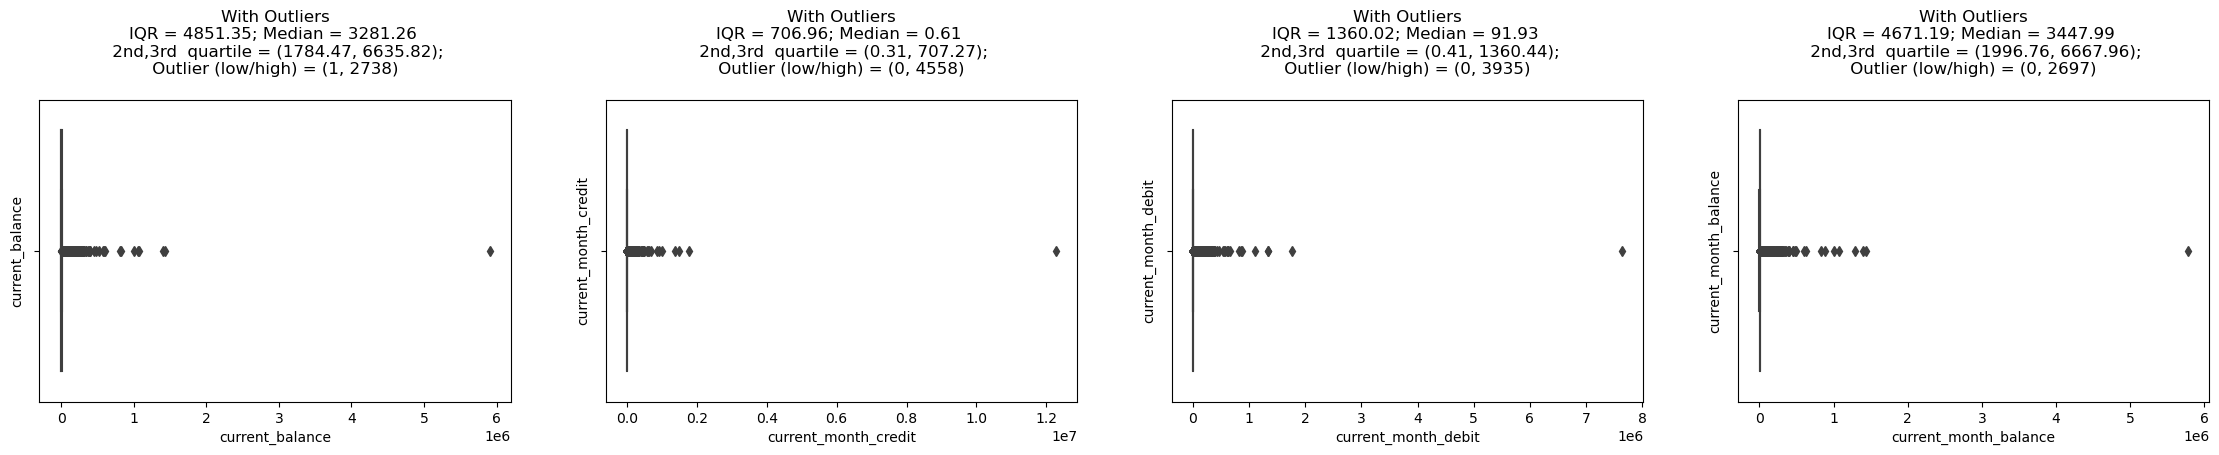

In [43]:
UVA_outlier(data, current_month,)

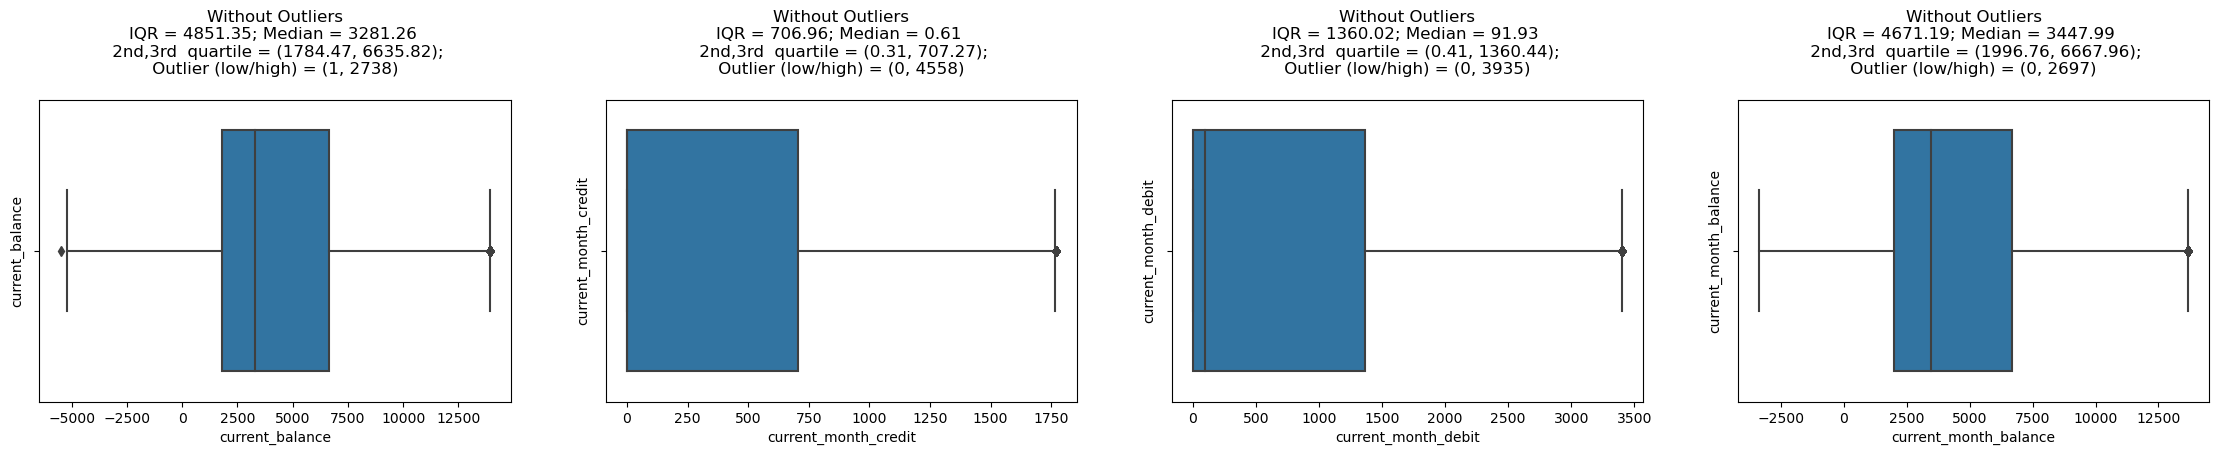

In [44]:
UVA_outlier(data, current_month, include_outlier=False)

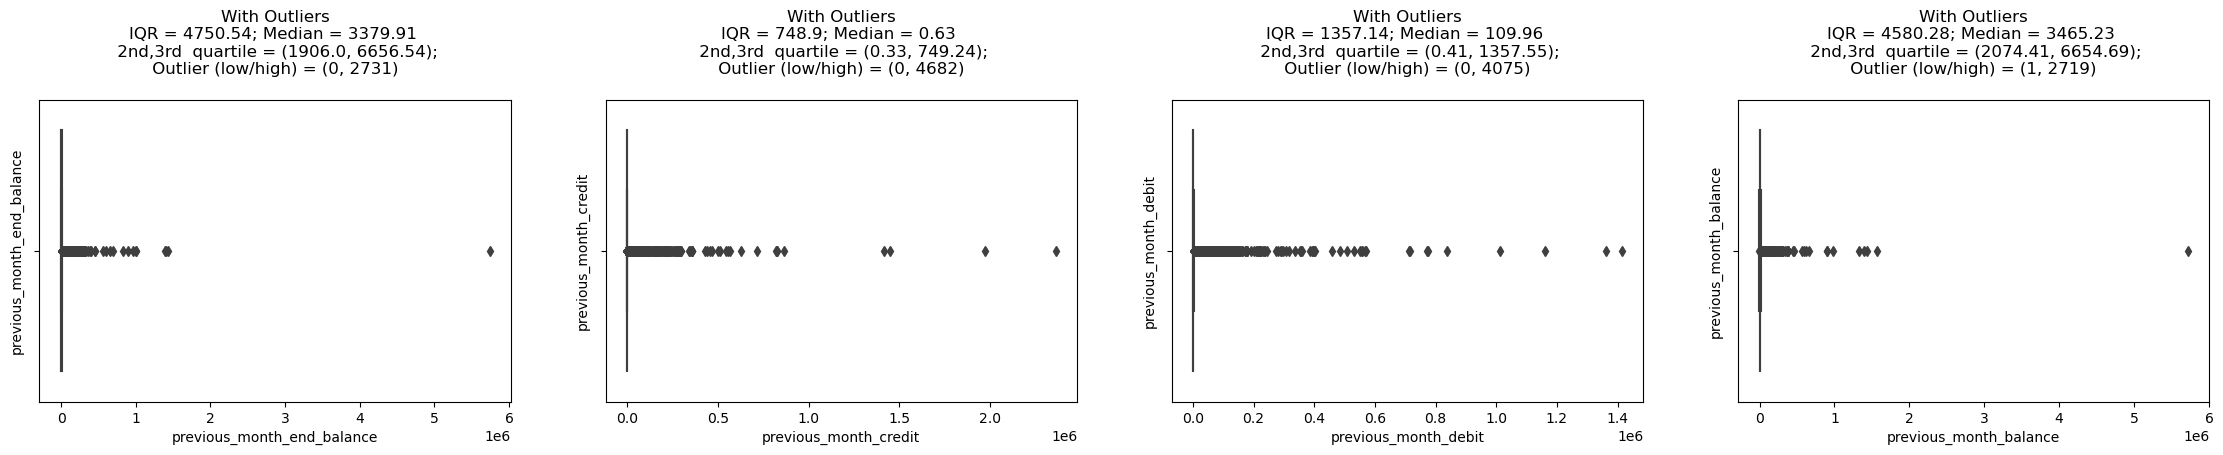

In [45]:
UVA_outlier(data, previous_month)

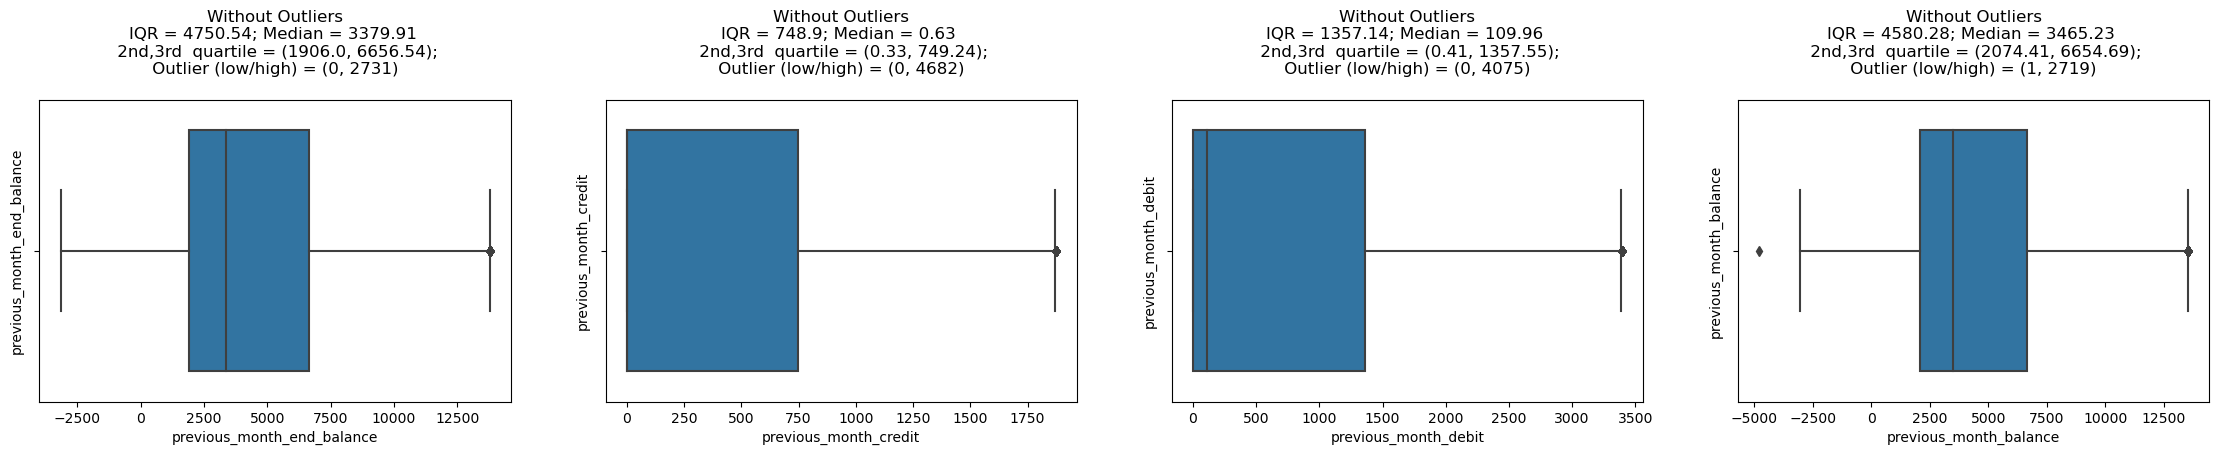

In [46]:
UVA_outlier(data, previous_month, include_outlier=False)

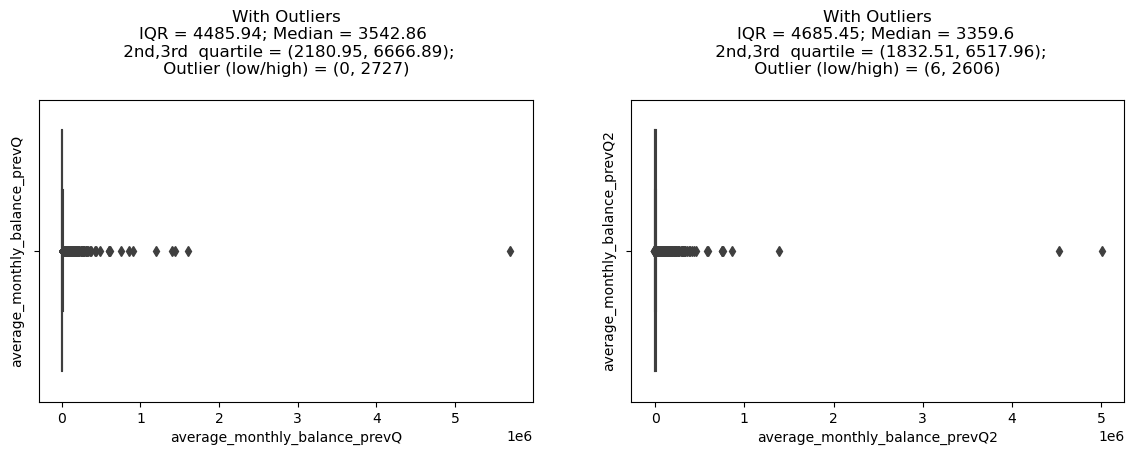

In [47]:
UVA_outlier(data,previous_quarters)

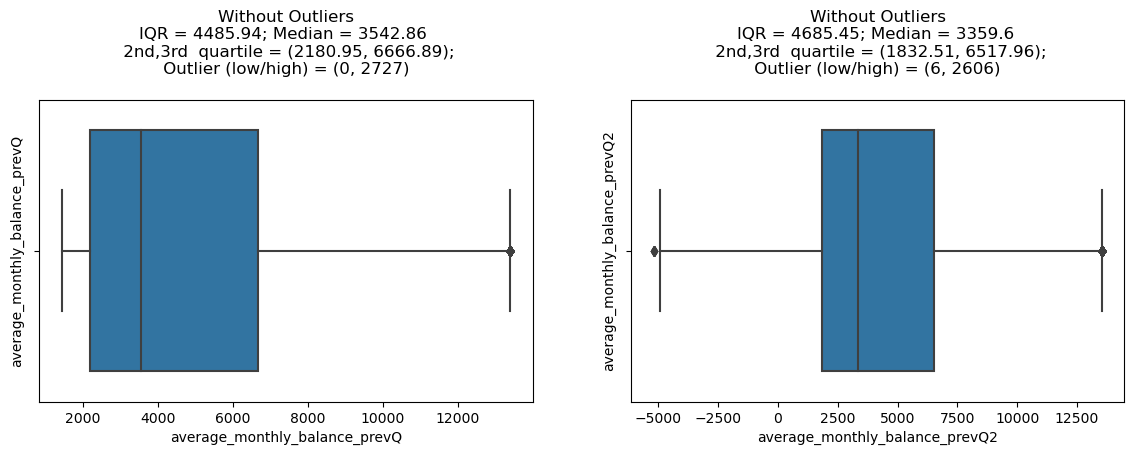

In [48]:
UVA_outlier(data,previous_quarters, include_outlier = False)

In [49]:
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
Unnamed: 22                       float64
Unnamed: 23                       float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [50]:
# correlation matrix
correlation = numerical.dropna().corr()
correlation

,customer_id,vintage,age,dependents,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,Unnamed: 22,Unnamed: 23,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_since_last_transaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_month_end_balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_monthly_balance_prevQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_monthly_balance_prevQ2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_month_credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


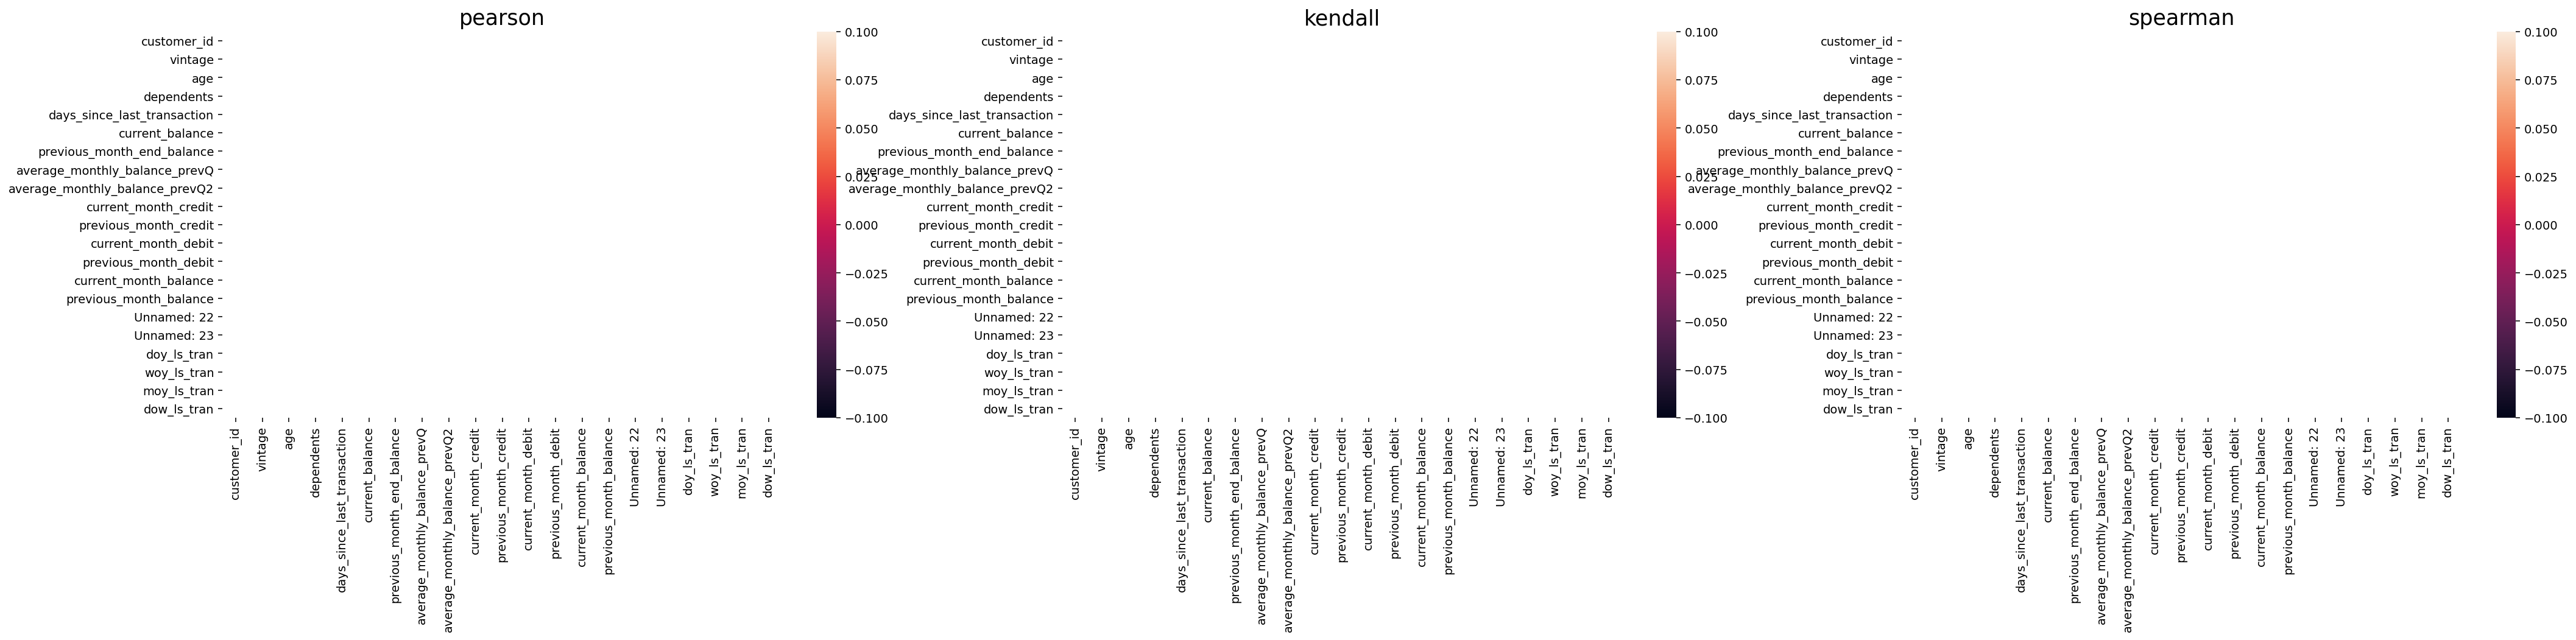

In [51]:
# plotting heatmap using all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



In [52]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

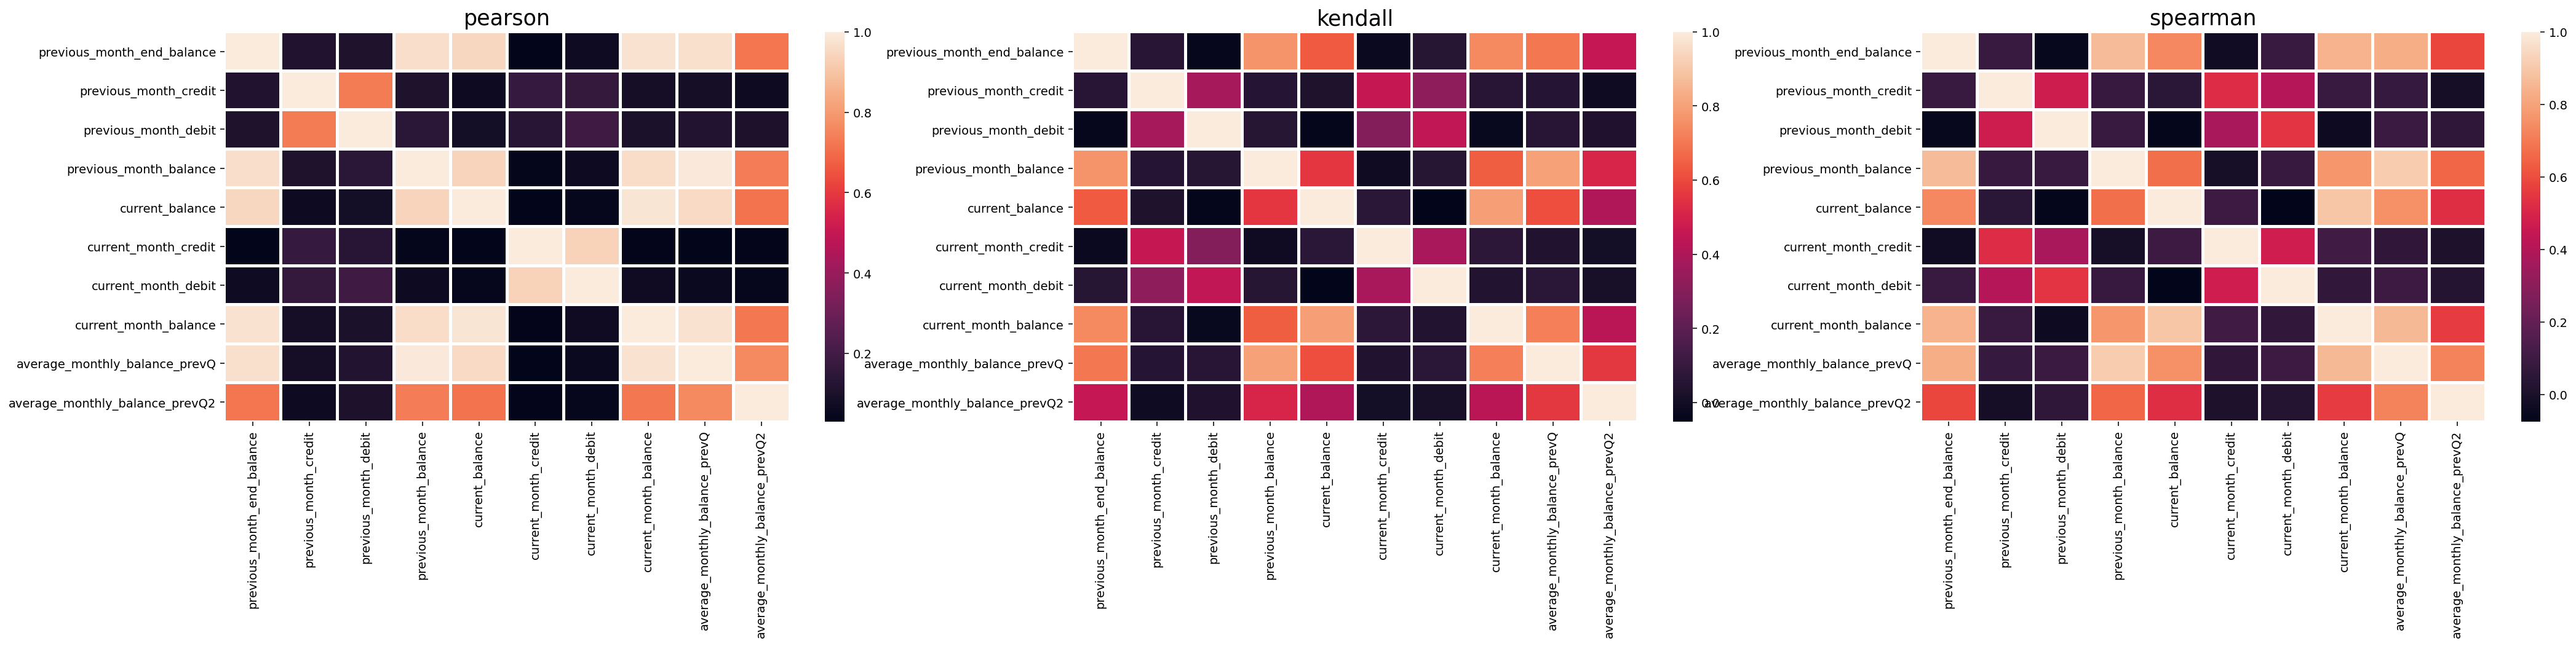

In [53]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [54]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

<Figure size 840x560 with 0 Axes>

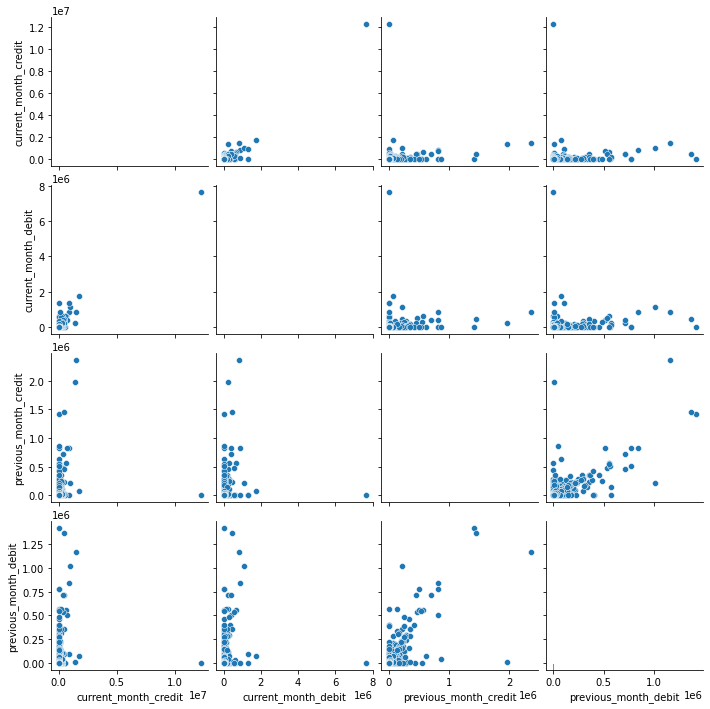

In [55]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

In [56]:
# taking log of every value
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

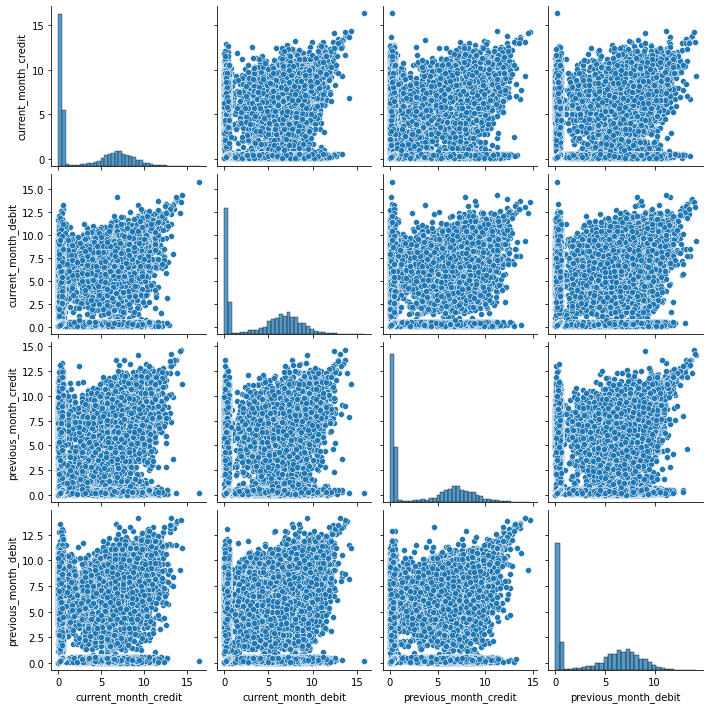

In [57]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

<Figure size 840x560 with 0 Axes>

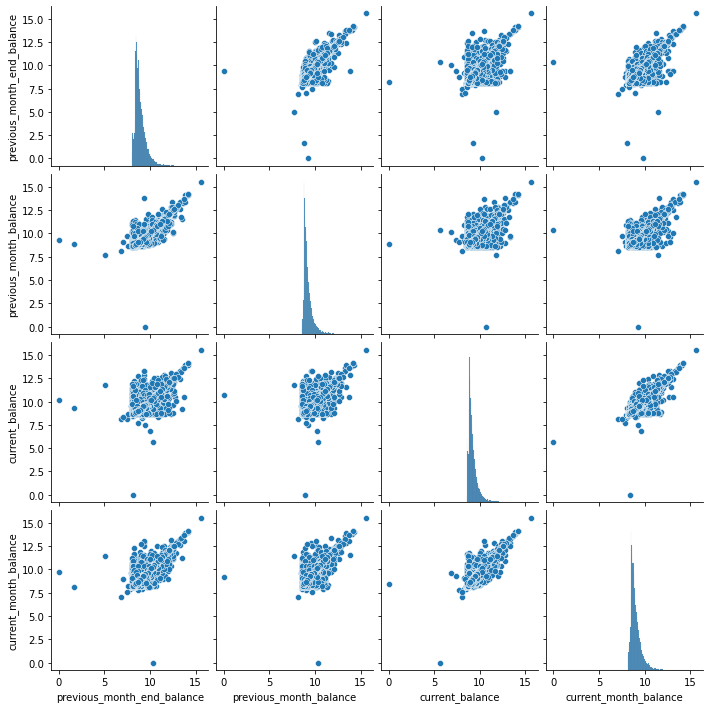

In [58]:
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

<AxesSubplot:xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

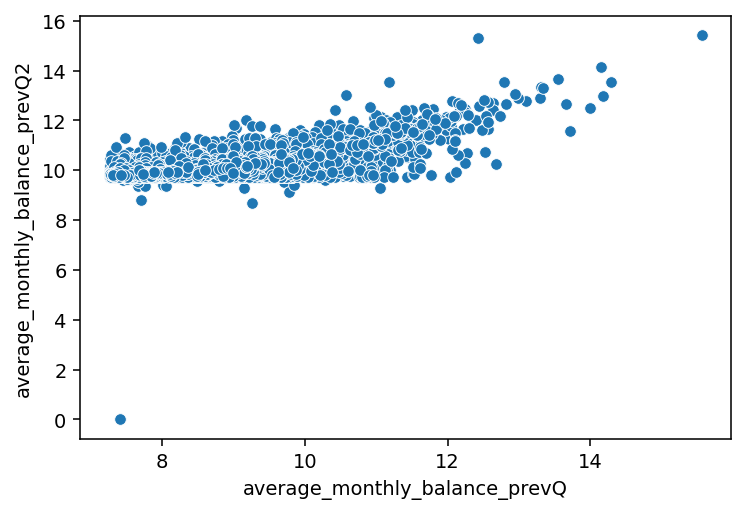

In [59]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(numerical['average_monthly_balance_prevQ'], numerical['average_monthly_balance_prevQ2'])

In [60]:
# Gender, Occupation, Customer Net worth category with Churn
data['gender'] = data['gender'].astype('object')
data['occupation'] = data['occupation'].astype('object')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['churn'] = data['churn'].astype('int')
data['city'] = data['city'].astype('float')
data['branch_code'] = data['branch_code'].astype('float')

* Suitable datatype for Creating Pivot table in Pandas version (categorical datatype is not supported)

In [61]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

In [62]:
# Gender, Occupation, Age with Churn
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [63]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

In [64]:
# Gender, Age, Occupation and Current Balance with Churn
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [65]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

In [66]:
def Group_Box_Plot(data, cont, cat1, cat2):
    #custom function to show multiple boxplots
    
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')

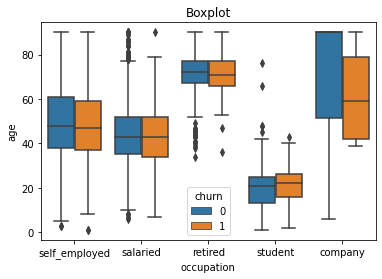

In [67]:
# Age and Occupation with Churn
Group_Box_Plot(data,'age', 'occupation', 'churn')

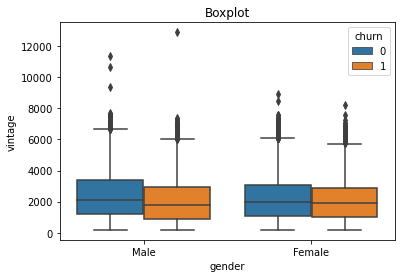

In [68]:
# Vontage and Gender with Churn
Group_Box_Plot(data,'vintage','gender', 'churn')

In [69]:
# Current and Previous month balances with Churn
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data1.columns

In [70]:
data1['churn'] = data['churn']

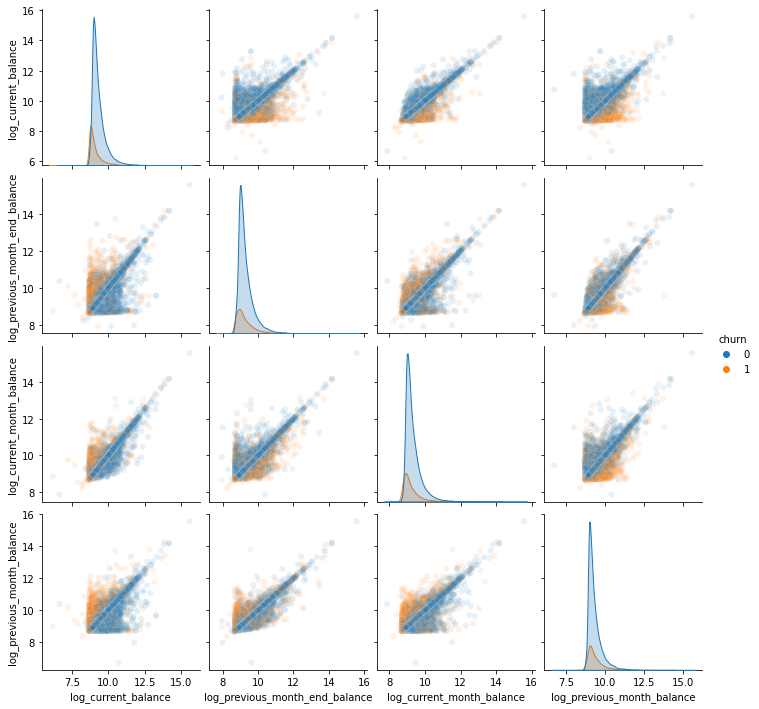

In [71]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

In [72]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

In [73]:
data1['churn'] = data['churn']

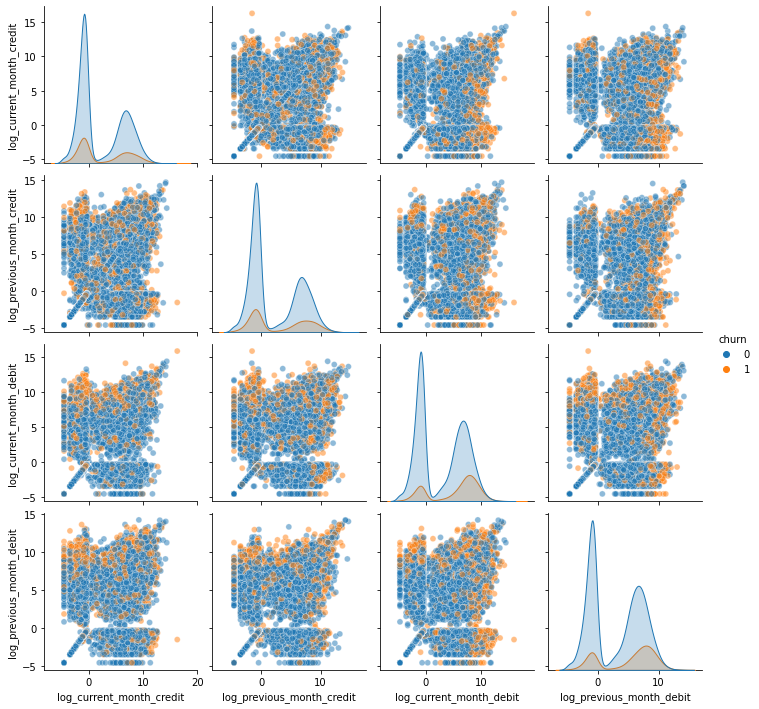

In [74]:
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

In [75]:
# encoding the variables so every variable has numerical value
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,customer_id,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,3135,66,0,187.0,755.0,224.0,1458.71,1458.71,1458.71,...,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2,310,35,0,NaN,3214.0,60.0,5390.37,8704.66,7799.26,...,44.0,11.0,4.0,1,0,0,1,0,1,0
2,4,2356,31,0,146.0,41.0,NaN,3913.16,5815.29,4910.17,...,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5,478,90,<NA>,1020.0,582.0,147.0,2291.91,2291.91,2084.54,...,32.0,8.0,1.0,0,0,0,1,0,1,0
4,6,2531,42,2,1494.0,388.0,58.0,927.72,1401.72,1643.31,...,44.0,11.0,6.0,1,0,0,1,0,0,1


In [76]:
# filling missing values
def fill_mode(df):
    for column in df.columns:
        # Check if there is at least one non-NaN value in the column
        if not df[column].isnull().all():
            mode_value = df[column].mode()
            # Check if the mode result is not empty before accessing the first element
            if not mode_value.empty:
                df[column].fillna(mode_value[0], inplace=True)

In [77]:
fill_mode(data_encoded)

In [78]:
columns_to_drop = data_encoded.columns[data_encoded.isnull().any()].tolist()
columns_to_drop

['Unnamed: 22', 'Unnamed: 23']

In [79]:
data_encoded = data_encoded.drop(columns=columns_to_drop)
data_encoded.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'city', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran',
       'gender_Male', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [80]:
data_encoded = data_encoded.drop('customer_id', axis=1)

In [81]:
#seperating independent and dependent variables
x = data_encoded.drop(['churn'], axis=1)
y = data_encoded['churn']
x.shape, y.shape

((28382, 27), (28382,))

In [82]:
data_encoded.columns

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran',
       'gender_Male', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [83]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [85]:
cols = train_x.columns
cols

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_tran',
       'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran', 'gender_Male',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student', 'customer_nw_category_2',
       'customer_nw_category_3'],
      dtype='object')

In [86]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.073198,0.348315,0.000000,0.378034,0.499686,0.024658,0.002316,0.001973,0.000966,0.003331,...,0.980392,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.133501,0.516854,0.000000,0.009102,0.199749,0.073973,0.000937,0.000563,0.000011,0.003458,...,0.941176,1.000000,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.154022,0.808989,0.000000,0.618932,0.232796,0.000000,0.001390,0.000922,0.000114,0.003467,...,1.000000,1.000000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.180910,0.258427,0.000000,0.906553,0.210625,0.219178,0.001194,0.000870,0.000132,0.003326,...,0.784314,0.818182,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.348848,0.494382,0.019231,0.665049,0.019034,0.030137,0.010039,0.011464,0.011463,0.013612,...,0.980392,1.000000,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.296721,0.516854,0.019231,0.747573,0.021334,0.016438,0.001343,0.000952,0.000220,0.004242,...,1.000000,1.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.217784,0.337079,0.000000,0.665049,0.018406,0.169863,0.001781,0.001474,0.000652,0.004185,...,0.843137,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.212595,0.629213,0.000000,0.374393,0.047689,0.339726,0.001189,0.000873,0.000020,0.003524,...,0.666667,0.636364,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.047174,0.269663,0.000000,0.618932,0.230914,0.208219,0.000911,0.000578,0.000902,0.007583,...,0.803922,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.201981,0.853933,0.000000,0.248180,0.068605,0.931507,0.000986,0.000654,0.000241,0.003854,...,0.058824,0.000000,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [88]:
# checking predictive accuracy score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score

logreg = LogReg()
logreg.fit(train_x, train_y)

train_predict = logreg.predict(train_x)
train_predict

k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )

test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score', k )

Training accuracy_score 0.824203701963732
Test accuracy_score 0.8290586245772266


In [89]:
C = [10, 1, .1, .00001]

for c in C:
    clf = LogReg(penalty='l1', solver='liblinear', C=c,)
    clf.fit(train_x, train_y)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(train_x, train_y))
    print('Test accuracy:', clf.score(test_x, test_y))
    print('')

C: 10
Coefficient of each feature: [[-1.12864493e-04 -2.94487557e-03  3.46849425e-02  9.81529090e-06
   3.01911385e-05 -1.35346810e-03 -1.71717229e-04 -4.24394996e-06
   1.91308626e-04 -9.65005198e-06 -8.56721094e-06 -2.81135918e-06
   1.14396300e-05  4.80432939e-06 -1.03531221e-05 -3.24639474e-05
  -6.27401882e-03 -2.61203065e-03  1.99349947e-01  4.12416057e-02
   1.34020368e-01 -1.73596603e-01 -1.17655915e-01  8.55941481e-02
  -3.10609867e-01 -5.05990308e-02 -1.65943522e-02]]
Training accuracy: 0.8240627642581979
Test accuracy: 0.8282130777903044

C: 1
Coefficient of each feature: [[-1.12667518e-04 -2.93441996e-03  3.46339480e-02  9.20354501e-06
   2.99371701e-05 -3.44664927e-03 -1.71782822e-04 -4.23279301e-06
   1.91386584e-04 -9.62934460e-06 -8.56481519e-06 -2.81142630e-06
   1.14381054e-05  4.80800880e-06 -1.03363493e-05 -3.25104289e-05
  -8.27826618e-03 -2.62567191e-03  1.96567120e-01  4.11172912e-02
   1.31956218e-01 -5.11437318e-02  0.00000000e+00  2.01842300e-01
  -1.88612841e